
### Task 1
1. Use the titanic Dataset 
2.Create an Auto Encoder and fit it with our data using 3 neurons in the dense layer 
3. Display new reduced dimension values 
4. Plot loss for different encoders [ Sparse Autoencoder, Noise Autoencoder] 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1

2026-01-06 15:13:59.235376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 15:13:59.242467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767692639.250865  148744 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767692639.253271  148744 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767692639.259683  148744 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
X = pd.read_csv('/media/smayan/500GB SSD/Study/ML2/Practicals/Data/titanic.csv')
X = X.drop(['Name'], axis=1)
X = X.dropna()
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(887, 7)

#### Standard Autoencoder with 3 neurons

In [4]:
autoencoder_standard = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(3, activation='relu'),
    Dense(X_scaled.shape[1], activation='sigmoid')
])
autoencoder_standard.compile(optimizer='adam', loss='mse')
history_standard = autoencoder_standard.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2, verbose=0)
print("Standard Autoencoder trained")

I0000 00:00:1767692640.215880  148744 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9430 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


I0000 00:00:1767692640.907930  148929 service.cc:152] XLA service 0x76f98c0159b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767692640.907945  148929 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2026-01-06 15:14:00.918460: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1767692640.957016  148929 cuda_dnn.cc:529] Loaded cuDNN version 91701
I0000 00:00:1767692641.293912  148929 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Standard Autoencoder trained


In [5]:
encoder_standard = Sequential([autoencoder_standard.layers[0]])
encoded_data_standard = encoder_standard.predict(X_scaled, verbose=0)
encoded_data_standard

array([[3.5411086 , 0.        , 1.276397  ],
       [0.        , 6.7791452 , 2.3451548 ],
       [0.        , 1.7229929 , 5.348138  ],
       ...,
       [0.        , 0.        , 0.86455894],
       [0.        , 3.925838  , 3.3518715 ],
       [4.1106935 , 0.34664726, 1.3035209 ]], dtype=float32)

#### Sparse Autoencoder with L1 Regularization

In [6]:
autoencoder_sparse = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(3, activation='relu', activity_regularizer=l1(0.001)),
    Dense(X_scaled.shape[1], activation='sigmoid')
])
autoencoder_sparse.compile(optimizer='adam', loss='mse')
history_sparse = autoencoder_sparse.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2, verbose=0)
print("Sparse Autoencoder trained")

Sparse Autoencoder trained


In [7]:
encoder_sparse = Sequential([autoencoder_sparse.layers[0]])
encoded_data_sparse = encoder_sparse.predict(X_scaled, verbose=0)
encoded_data_sparse

array([[2.271923  , 0.41476616, 0.        ],
       [0.        , 0.64568686, 3.435482  ],
       [2.4296792 , 0.7312726 , 2.4251144 ],
       ...,
       [0.        , 4.9790163 , 0.        ],
       [0.85980815, 0.        , 2.6054597 ],
       [2.4256983 , 0.        , 0.        ]], dtype=float32)

#### Noise Autoencoder (Denoising Autoencoder)

In [8]:
noise_factor = 0.2
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_scaled.shape)

autoencoder_noise = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(3, activation='relu'),
    Dense(X_scaled.shape[1], activation='sigmoid')
])
autoencoder_noise.compile(optimizer='adam', loss='mse')
history_noise = autoencoder_noise.fit(X_noisy, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2, verbose=0)
print("Noise Autoencoder trained")

Noise Autoencoder trained


In [9]:
encoder_noise = Sequential([autoencoder_noise.layers[0]])
encoded_data_noise = encoder_noise.predict(X_scaled, verbose=0)
encoded_data_noise

array([[3.4676294 , 1.7265065 , 0.        ],
       [0.        , 1.48592   , 5.9307013 ],
       [0.        , 2.3195555 , 2.1944966 ],
       ...,
       [0.        , 0.10084236, 0.        ],
       [0.        , 3.0040445 , 2.6849098 ],
       [4.5698586 , 1.6916895 , 0.5260957 ]], dtype=float32)

#### Loss Comparison Plot

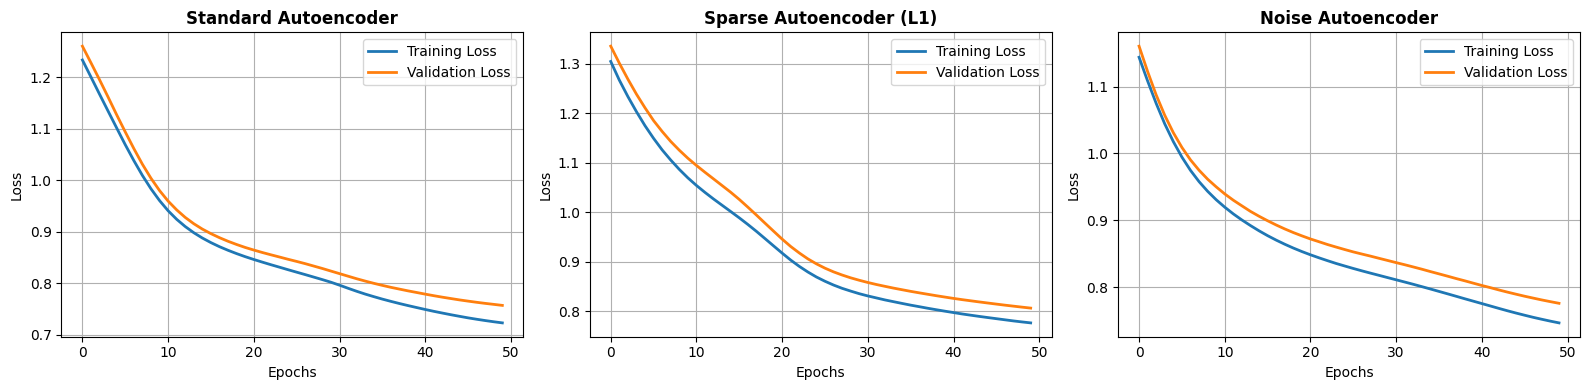

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(history_standard.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history_standard.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Standard Autoencoder', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()

axes[1].plot(history_sparse.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history_sparse.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Sparse Autoencoder (L1)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

axes[2].plot(history_noise.history['loss'], label='Training Loss', linewidth=2)
axes[2].plot(history_noise.history['val_loss'], label='Validation Loss', linewidth=2)
axes[2].set_title('Noise Autoencoder', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Loss')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()